In [116]:
from sklearn.linear_model import LinearRegression # Model
from sklearn.metrics import r2_score # Goodness of fit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
# data transformation, data augmentation

import matplotlib.pyplot as plt # plotting
import pandas as pd # data manipulation and analysis
import numpy as np # numerical computation

In [117]:
df = pd.read_csv('CAE_dataset.csv')

In [118]:
df.shape

(385768, 13)

In [119]:
df.head(n=10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,label,Id
0,0,0.134880,-42.08892,-0.037386,-0.184788,50.546875,19.775391,86.24073,-0.304381,-0.452958,132.4768,0,327
1,1,0.134641,-41.84206,-0.036891,-0.181393,50.468750,19.775391,86.99523,-0.290598,-0.421575,132.4768,0,327
2,2,0.135263,-41.84206,-0.035995,-0.181039,50.000000,19.726562,86.99523,-0.273311,-0.383049,132.4768,0,327
3,3,0.136999,-41.58644,-0.035182,-0.182234,50.000000,18.359375,87.54987,-0.254571,-0.338215,132.4768,0,327
4,4,0.139939,-41.58644,-0.034691,-0.183275,50.000000,15.673828,87.85726,-0.236445,-0.287707,132.4768,0,327
5,5,0.145020,-41.31210,-0.034604,-0.182941,50.000000,14.453125,88.10708,-0.218828,-0.232299,-15.0000,0,327
6,6,0.152368,-41.31210,-0.034872,-0.181277,50.000000,14.453125,88.10708,-0.201764,-0.173022,-15.0000,0,327
7,7,0.162351,-41.01352,-0.035338,-0.178921,50.000000,14.160156,88.29228,-0.185751,-0.110890,-15.0000,0,327
8,8,0.175336,-41.01352,-0.035692,-0.176137,50.000000,14.355469,88.43326,-0.170670,-0.046870,-15.0000,0,327
9,9,0.191372,-40.69315,-0.035737,-0.173213,50.000000,15.478516,88.53726,-0.156759,0.018181,-15.0000,0,327


plotting the first feature as a function of time

In [132]:
# want all the features so that i chunk each test run

def get_features_by_test_run(df):
    features = np.transpose([np.array(df.iloc[:,n]) for n in range(1,13)])
    
    indexes = list_of_indexes(df)
    features_by_run = []
    for i in indexes:
        
    
np.transpose(get_features_by_test_run(df))[0]

array([ 1.34879695e-01, -4.20889200e+01, -3.73856570e-02, -1.84787924e-01,
        5.05468750e+01,  1.97753906e+01,  8.62407300e+01, -3.04380954e-01,
       -4.52957744e-01,  1.32476800e+02,  0.00000000e+00,  3.27000000e+02])

In [120]:

# all of the features
def get_features(df):
    return [np.array(df.iloc[:,n]) for n in range(1,12)]
features = get_features(df)


#for i in range(len(features)): print(len(features[i]),end="\t")

In [134]:

# x is a list of start indexes of each person, [starting point index,pilot_id]
# returns x
def list_of_indexes(df):
    pilot_id = np.array(df.iloc[:,-1])
    x0 = pilot_id[0] # pilot id is the current
    x=[[0,pilot_id[0]]]
    for i in range(len(pilot_id)):
        if pilot_id[i]!=x0:
            x.append([i,pilot_id[i]])
            x0 = pilot_id[i]

    # find the number of ids that were counted twice
    #len(x)
    count=0
    for i in range(len(x)):
        for j in range(i+1,len(x)):
            if x[i][1]==x[j][1]:
                print(i,":",x[i],"\n",j,":",x[j])
                count+=1
    print(count)
    
    
    return x
        
x = list_of_indexes(df)
print(len(x))
print(count)


9 : [6162, 112] 
 35 : [25003, 112]
14 : [10347, 29] 
 67 : [51197, 29]
21 : [15409, 191] 
 27 : [19151, 191]
46 : [34197, 251] 
 228 : [177944, 251]
68 : [51873, 227] 
 96 : [74530, 227]
87 : [66958, 180] 
 107 : [83594, 180]
113 : [88173, 392] 
 292 : [228564, 392]
120 : [93021, 25] 
 148 : [115453, 25]
140 : [110309, 399] 
 156 : [120516, 399]
189 : [147844, 395] 
 234 : [182631, 395]
190 : [148486, 221] 
 243 : [189206, 221]
259 : [203179, 63] 
 298 : [233179, 63]
266 : [208371, 84] 
 287 : [224929, 84]
315 : [248047, 219] 
 330 : [263878, 219]
335 : [267842, 174] 
 363 : [289677, 174]
336 : [267994, 340] 
 367 : [293743, 340]
340 : [271498, 235] 
 355 : [283428, 235]
341 : [272361, 43] 
 359 : [286739, 43]
345 : [275373, 352] 
 360 : [287345, 352]
373 : [299936, 391] 
 381 : [306569, 391]
377 : [302788, 28] 
 385 : [309891, 28]
397 : [320422, 205] 
 417 : [338776, 205]
398 : [321547, 271] 
 425 : [346464, 271]
405 : [328095, 322] 
 413 : [335590, 322]
436 : [356075, 141] 
 459 : [

In [144]:
# plot the first person
i = 27 # e.g. the 5'th pilot's data, the index

def disp_features(i):
    #n=1
    
    plt.figure(figsize=(16,16))
    features = get_features()
    
    for n in range(len(features)):
        feature = features[n]
        plt.subplot(4,3,n+1)
        try: plt.plot(np.linspace(0,x[i][0]/10,x[i+1][0]-x[i][0]),feature[x[i][0]:x[i+1][0]])
        except: plt.plot(np.linspace(0,x[i][0]/10,x[i][0]),feature[x[i][0]:])

        if n==10: plt.title("0 or 1, defective pilot label")
        else: plt.title("feature n="+str(n))
        plt.xlabel("time in seconds")

    plt.show()
    
    
def disp_feat_start_index(start_index):
    plt.figure(figsize=(16,16))
    
    features = get_features()
    
    for n in range(len(features)):
        
        
        for n in range(len(features)):
            feature = features[n]
            plt.subplot(4,3,n+1)
            
            y = [i[0] for i in x]
            index_i = x.index(start_index)
            
            try: plt.plot(np.linspace(0,x[index_i][0]/10, x[index_i+1][0]-x[index_i][0]), feature[x[index_i][0]])
            except: print()
                
        plt.show()
        
disp_feat_start_index(647)
    


TypeError: get_features() missing 1 required positional argument: 'df'

<Figure size 1152x1152 with 0 Axes>

In [138]:
#x.index([0, 327])
x

[[0, 327],
 [647, 225],
 [1306, 102],
 [2170, 234],
 [2843, 242],
 [3438, 39],
 [4056, 336],
 [4722, 422],
 [5432, 217],
 [6162, 112],
 [6710, 375],
 [7236, 41],
 [8332, 4],
 [9388, 111],
 [10347, 29],
 [10415, 233],
 [11624, 293],
 [12497, 172],
 [13176, 412],
 [13967, 247],
 [14655, 20],
 [15409, 191],
 [15450, 353],
 [15985, 418],
 [16845, 129],
 [17592, 429],
 [18367, 404],
 [19151, 191],
 [19771, 410],
 [20625, 298],
 [21274, 408],
 [21962, 144],
 [22716, 300],
 [23537, 171],
 [24373, 142],
 [25003, 112],
 [25372, 80],
 [26061, 384],
 [26760, 125],
 [27882, 265],
 [29068, 110],
 [30262, 272],
 [30940, 160],
 [31657, 211],
 [32363, 379],
 [33314, 238],
 [34197, 251],
 [34463, 54],
 [35118, 128],
 [35853, 365],
 [36558, 106],
 [37306, 18],
 [38457, 27],
 [39424, 198],
 [40137, 280],
 [41258, 23],
 [42431, 68],
 [43254, 368],
 [43892, 178],
 [44848, 427],
 [45731, 2],
 [46590, 397],
 [47252, 83],
 [47918, 190],
 [48659, 133],
 [49234, 366],
 [50327, 426],
 [51197, 29],
 [51873, 227],

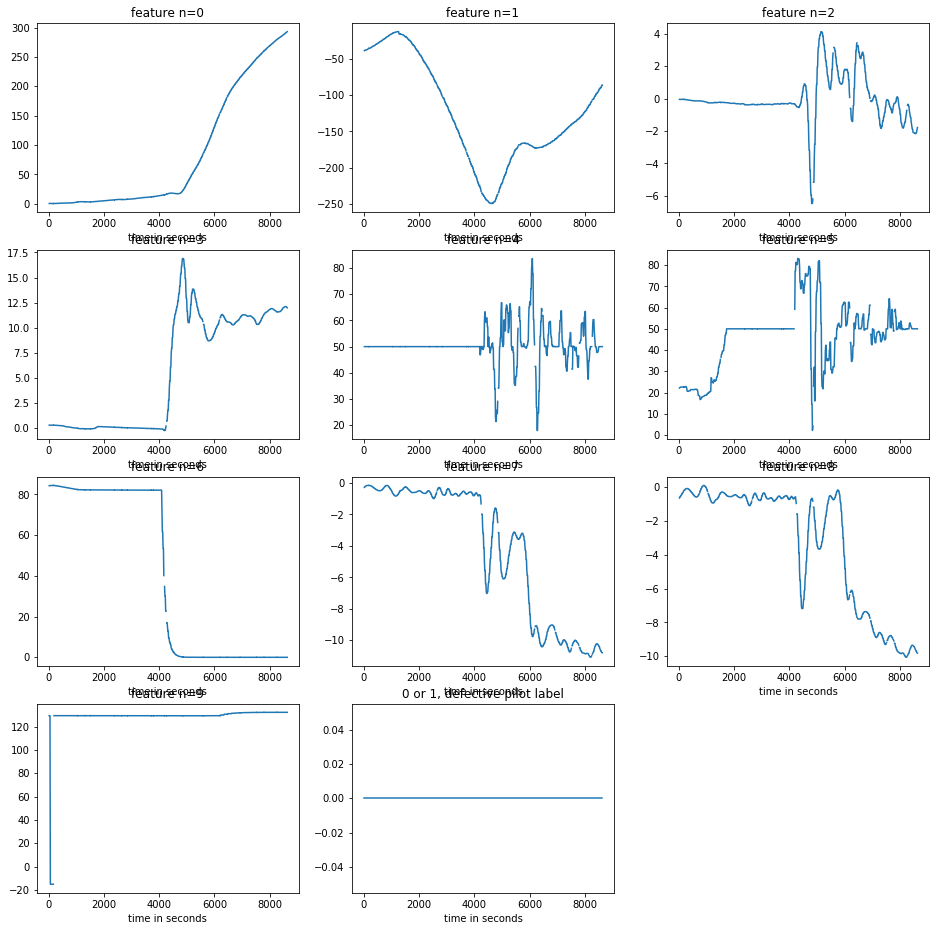

In [123]:
disp_features(111)